In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### import datasets

In [2]:
train_full = pd.read_csv('./Data/train.csv')
test_full = pd.read_csv('./Data/test.csv')

### Overview train_full

In [3]:
import pandas_profiling as pp

pp.ProfileReport(train_full)

C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\site-pa

### Overview test_full

In [4]:
pp.ProfileReport(test_full)

In [5]:
train_full.drop("Id", axis=1, inplace=True)
test_full.drop("Id", axis=1, inplace=True)

### Vérification des NA

In [6]:
print(f"Nombre de NAs dans train_full: \n {train_full.isna().sum()}")
print(f"Nombre de NAs dans test_full: \n {test_full.isna().sum()}")

Nombre de NAs dans train_full: 
 MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64
Nombre de NAs dans test_full: 
 MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64


### Identification des features Quantitatives et Qualitatives dans train_full

In [7]:
train_full.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [8]:
qual = train_full.select_dtypes(include=['object']).columns
print(f"Features Quali:\n {qual}")
quant = train_full.select_dtypes(include=['float64', 'int64']).columns
print(f"Features Quanti:\n {quant}")

Features Quali:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Features Quanti:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfB

In [9]:
num_quant_train_full = len(train_full.select_dtypes(include=['int64','float64']).columns)
num_qual_train_full = len(train_full.select_dtypes(include=['object']).columns)

print(f"{num_quant_train_full} features numériques & {num_qual_train_full} features catégorielles")

37 features numériques & 43 features catégorielles


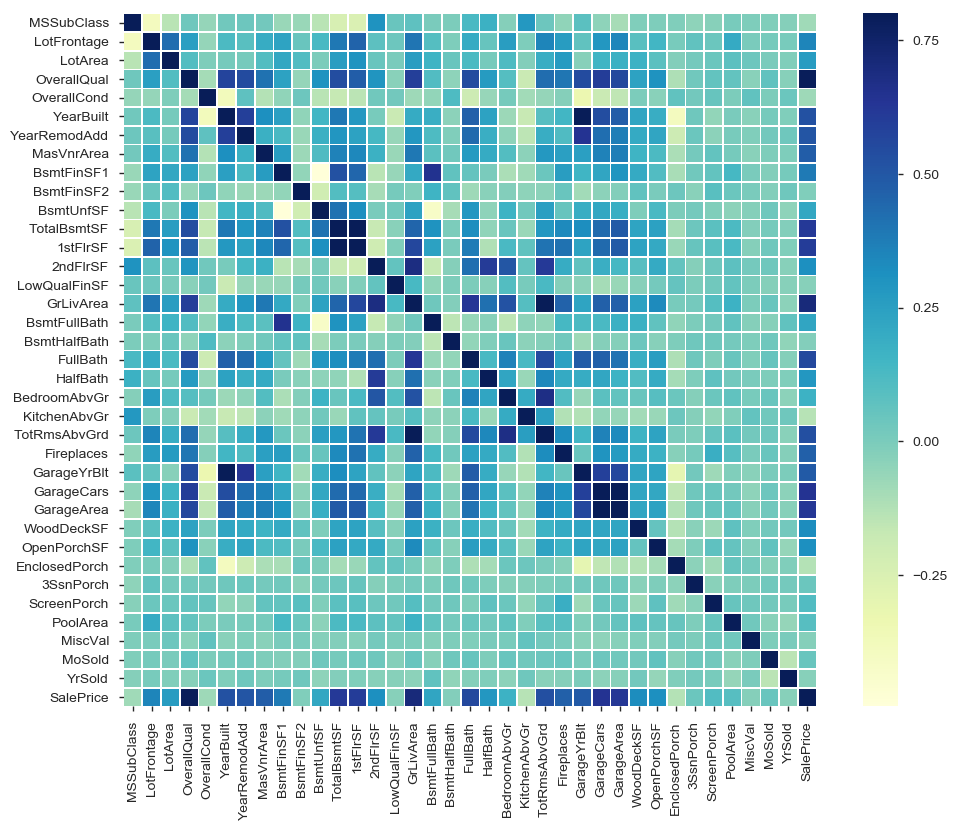

In [10]:
corrmat = train_full[quant].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, linewidths=.5, cmap="YlGnBu");

### Sélection des 10 plus grosses corrélations

In [11]:
cols = corrmat.nlargest(11,'SalePrice').index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

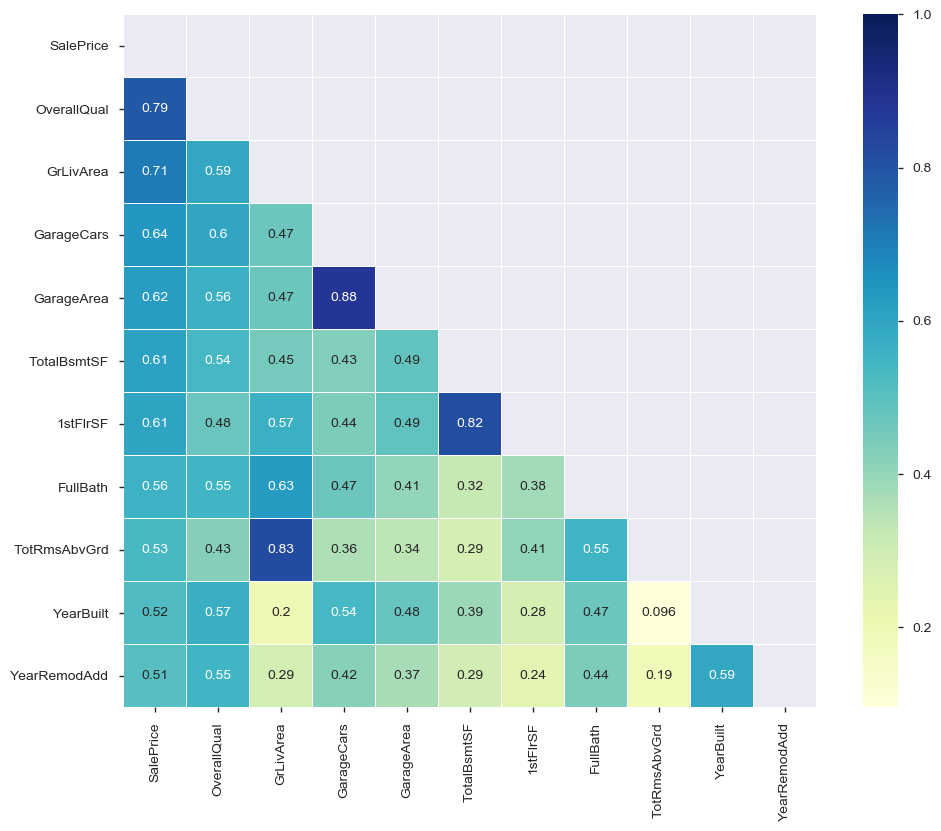

In [12]:
corrmat2 = train_full[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat2));

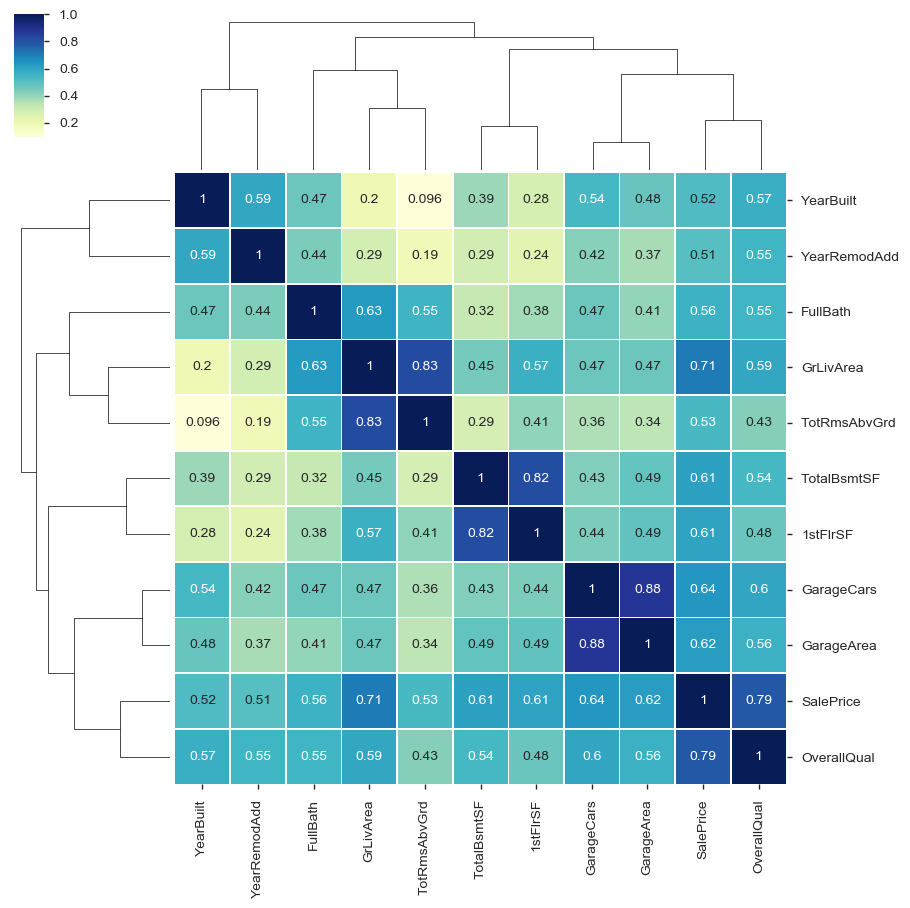

In [13]:
sns.clustermap(corrmat2, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True);

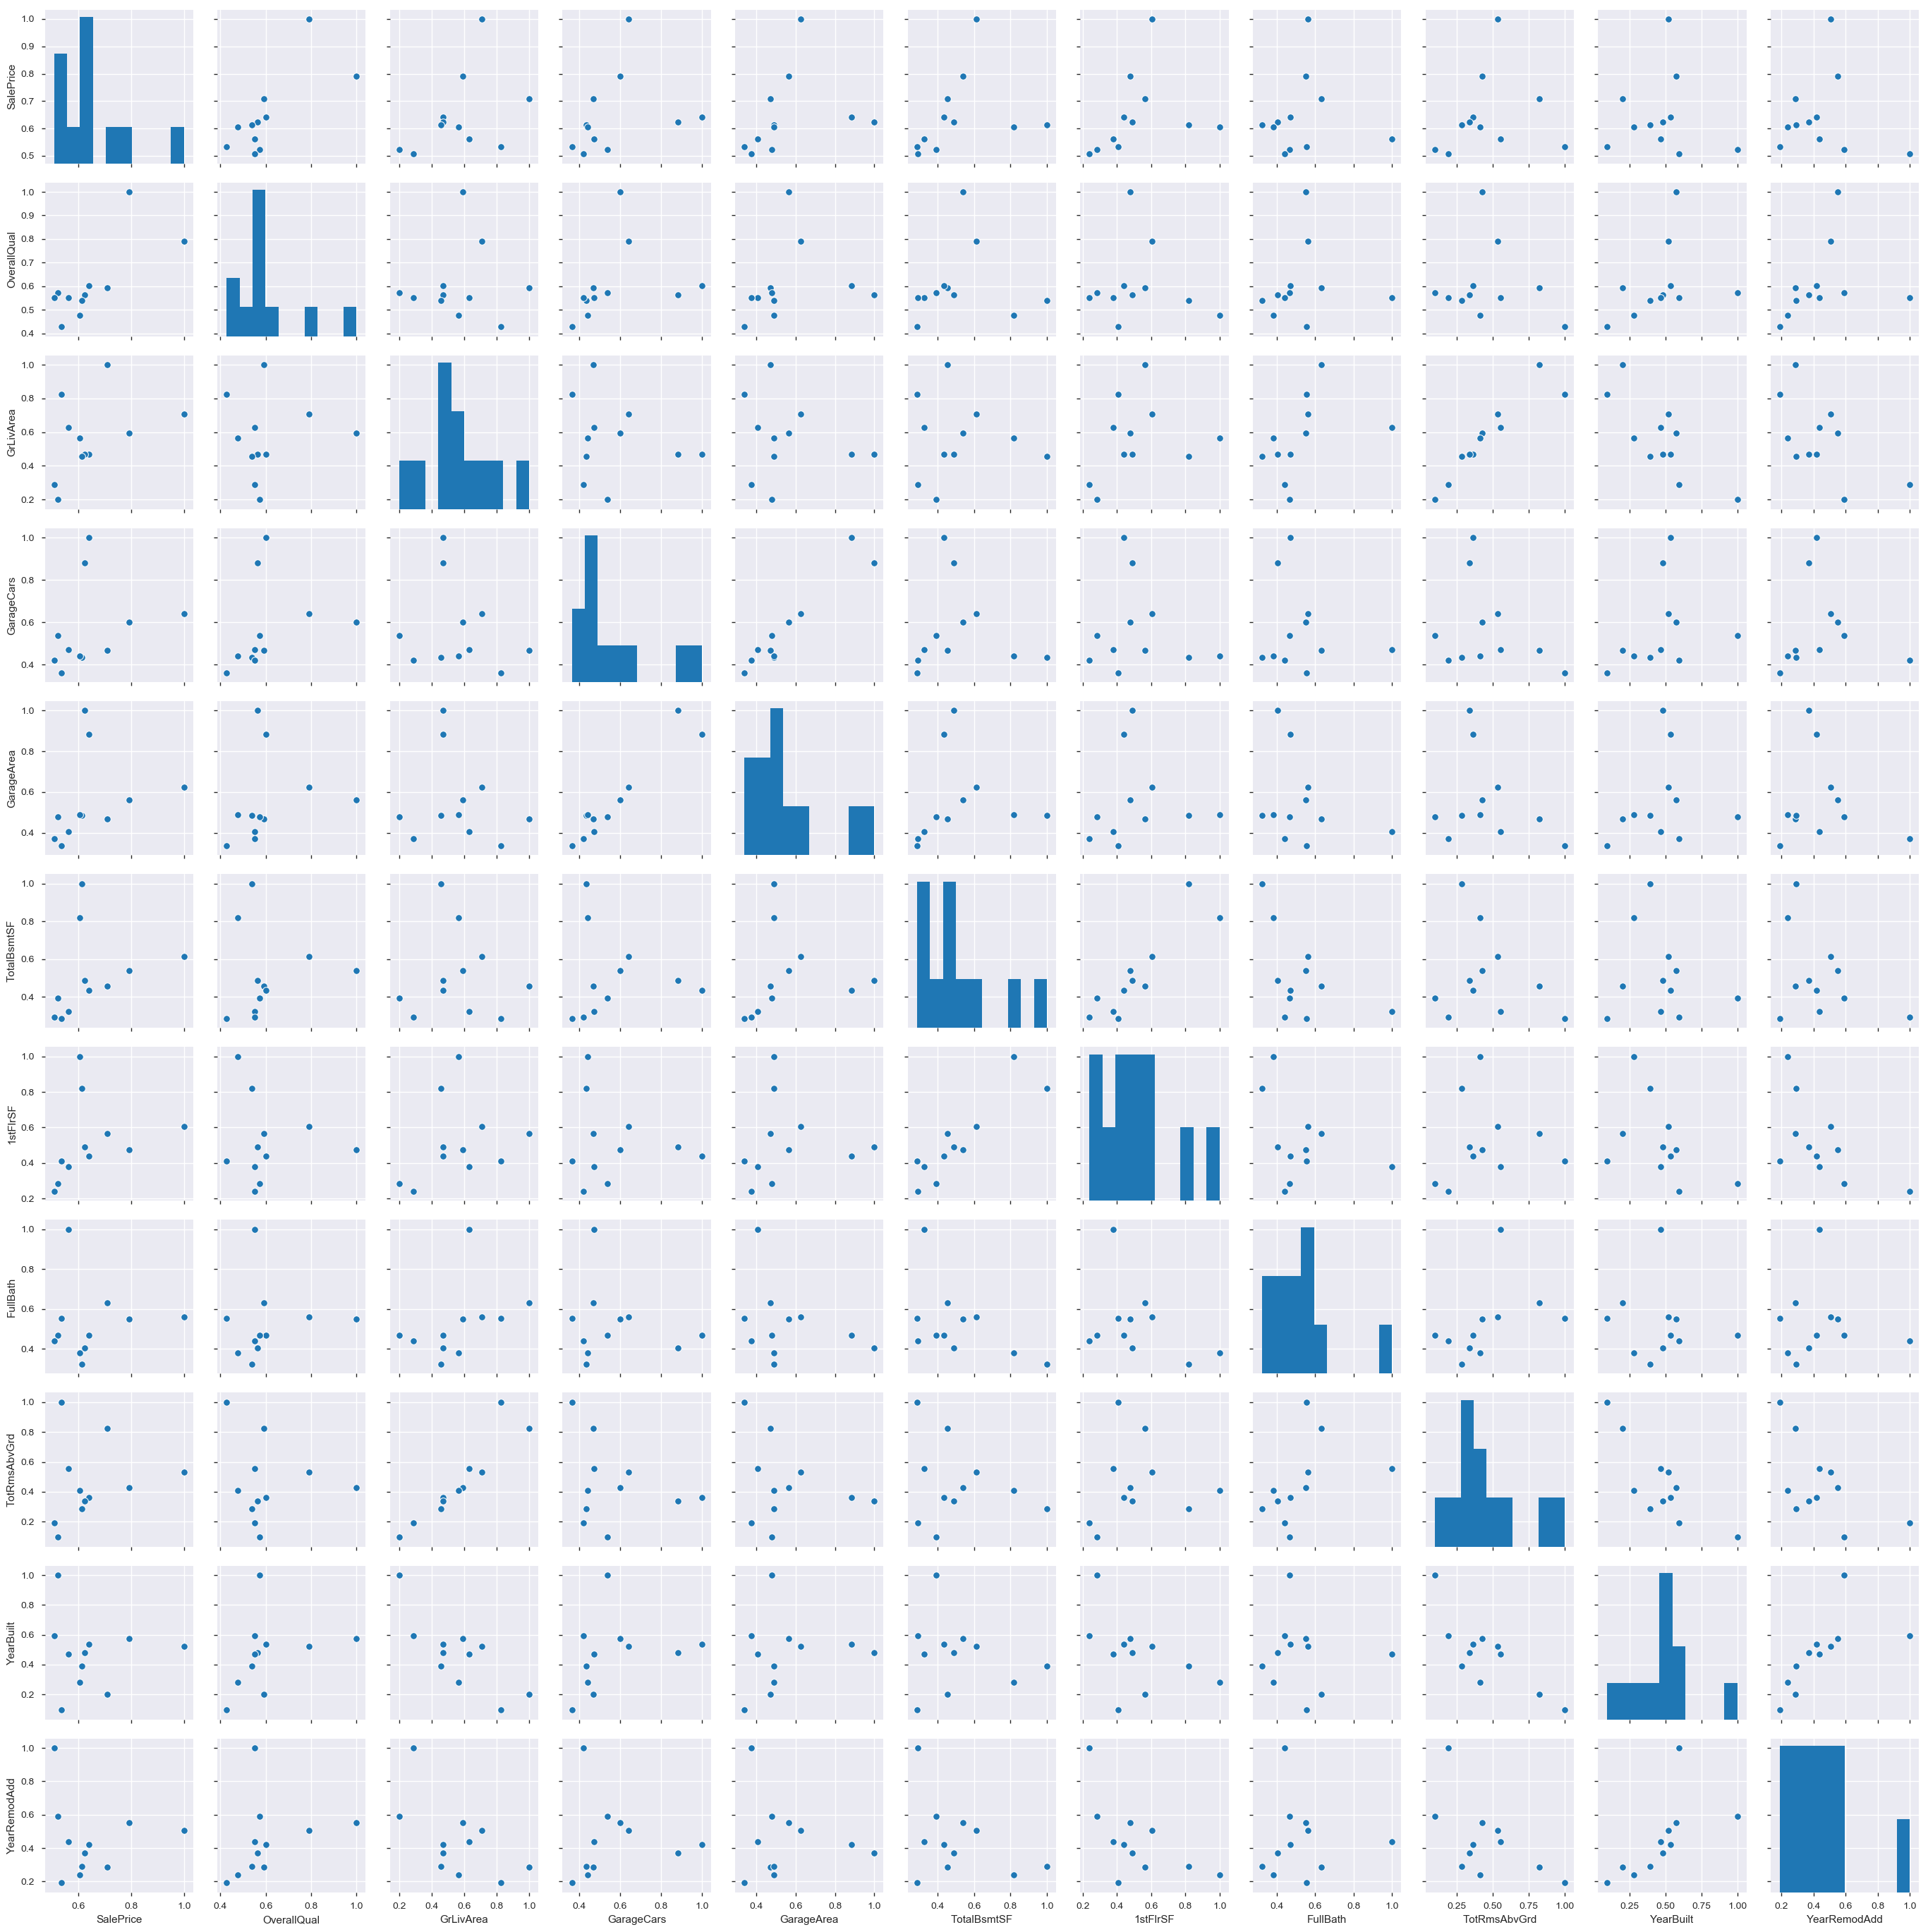

In [14]:
sns.pairplot(corrmat2)
plt.show()

In [15]:
corrmat2['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

### Visualisation data des 10 plus grosses corrélations avec SalePrice

corr : 0.791


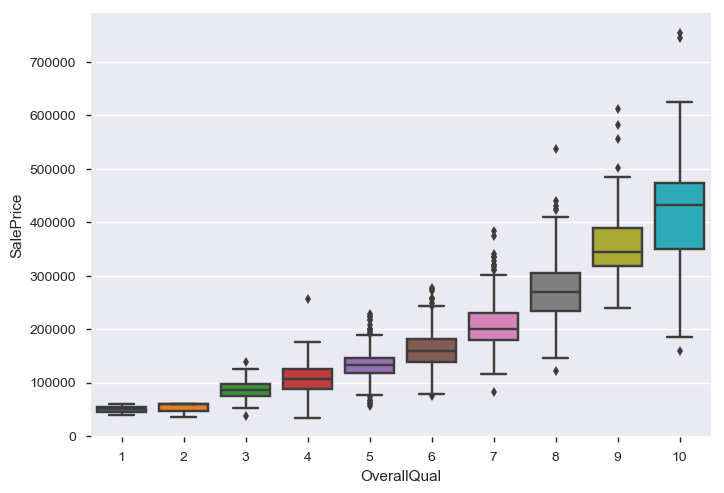

In [16]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train_full)
print(f"corr : {round(train_full['OverallQual'].corr(train_full['SalePrice']),3)}")

corr : 0.709


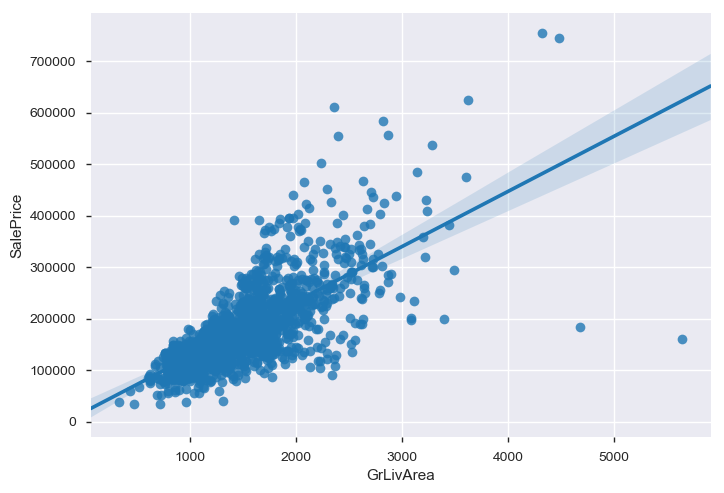

In [17]:
sns.regplot(x='GrLivArea',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['GrLivArea'].corr(train_full['SalePrice']),3)}")

corr : 0.721


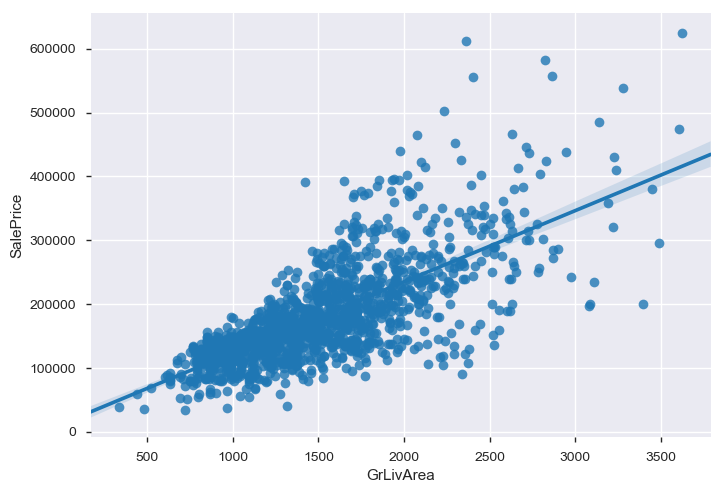

In [18]:
train_full = train_full.drop(train_full[(train_full['GrLivArea']>4000)].index).reset_index(drop=True)
sns.regplot(x='GrLivArea',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['GrLivArea'].corr(train_full['SalePrice']),3)}")

corr : 0.649


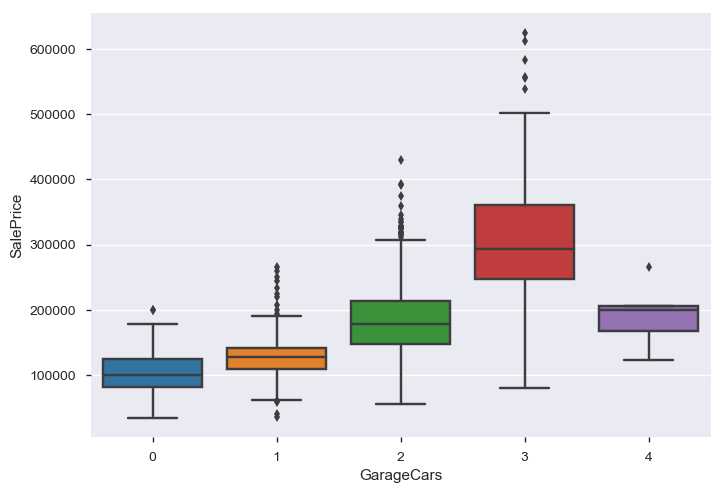

In [19]:
sns.boxplot(x='GarageCars',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['GarageCars'].corr(train_full['SalePrice']),3)}")

corr : 0.637


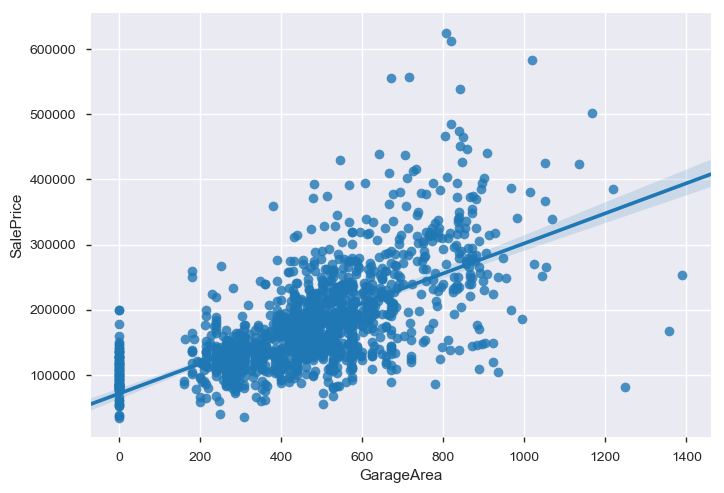

In [20]:
sns.regplot(x='GarageArea',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['GarageArea'].corr(train_full['SalePrice']),3)}")

corr : 0.647


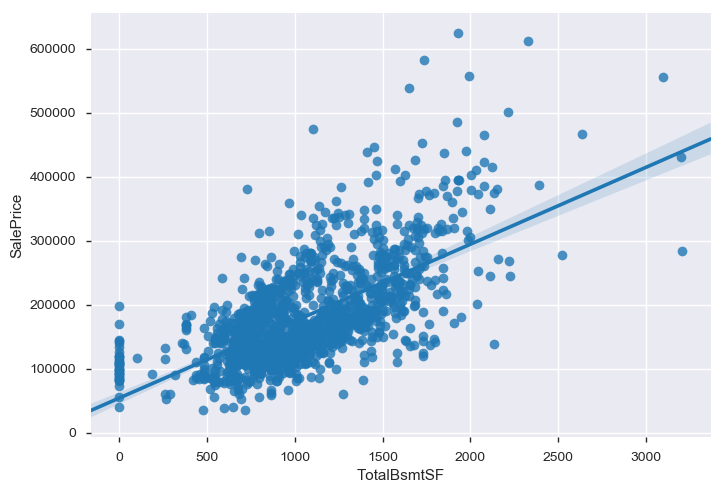

In [21]:
sns.regplot(x='TotalBsmtSF',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['TotalBsmtSF'].corr(train_full['SalePrice']),3)}")

corr : 0.625


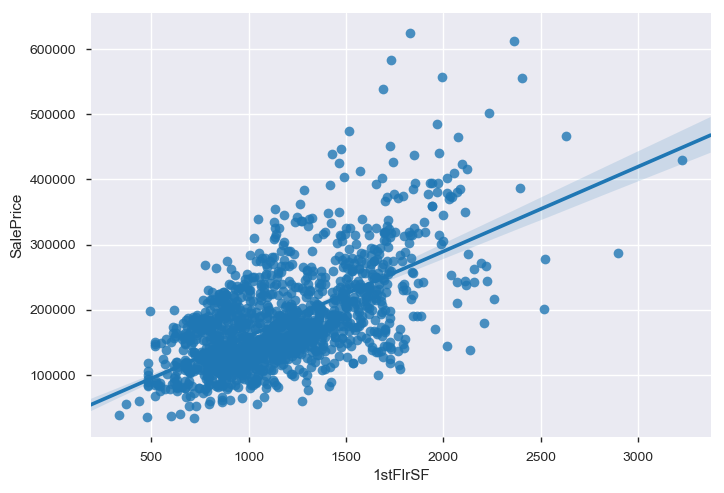

In [22]:
sns.regplot(x='1stFlrSF',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['1stFlrSF'].corr(train_full['SalePrice']),3)}")

corr : 0.559


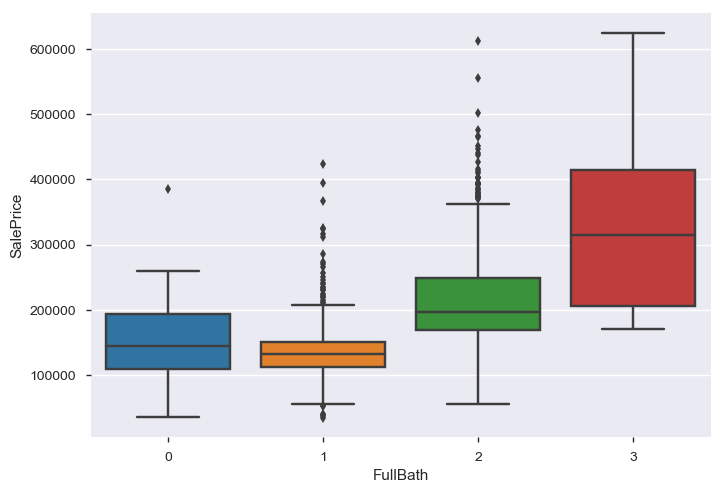

In [23]:
sns.boxplot(x='FullBath',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['FullBath'].corr(train_full['SalePrice']),3)}")

corr : 0.537


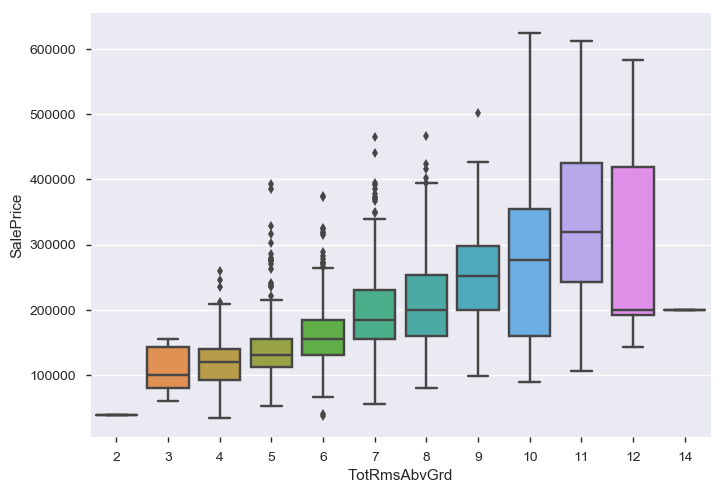

In [24]:
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['TotRmsAbvGrd'].corr(train_full['SalePrice']),3)}")

corr : 0.535


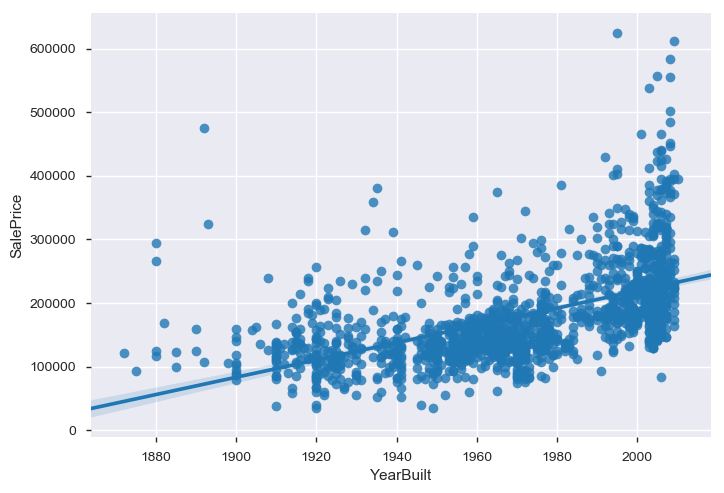

In [25]:
sns.regplot(x='YearBuilt',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['YearBuilt'].corr(train_full['SalePrice']),3)}")

corr : 0.521


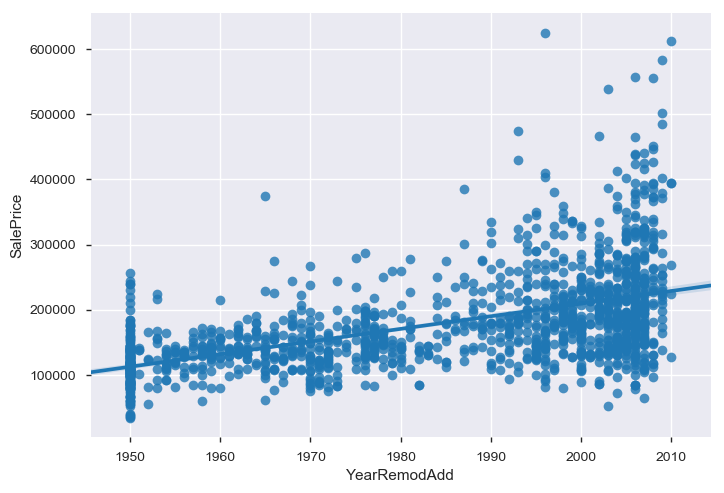

In [26]:
sns.regplot(x='YearRemodAdd',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['YearRemodAdd'].corr(train_full['SalePrice']),3)}")

In [27]:
corrmat3 = train_full[cols].corr()
corrmat3['SalePrice']

SalePrice       1.000000
OverallQual     0.800858
GrLivArea       0.720516
GarageCars      0.649256
GarageArea      0.636964
TotalBsmtSF     0.646584
1stFlrSF        0.625235
FullBath        0.559048
TotRmsAbvGrd    0.537462
YearBuilt       0.535279
YearRemodAdd    0.521428
Name: SalePrice, dtype: float64

In [28]:
print(f"Nombre de NAs dans train_full: \n {train_full.isna().sum()}")

Nombre de NAs dans train_full: 
 MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


### Transfo quali en quanti

In [29]:
train_full_qual=pd.get_dummies(train_full[qual], dtype='int64')
pp.ProfileReport(train_full_qual)


In [30]:
train_full_qual['SalePrice'] = train_full['SalePrice']
corrmat4 = train_full_qual.corr()
cols2 = corrmat4.nlargest(11,'SalePrice').index
corrmat5 = train_full_qual[cols2].corr()
corrmat5['SalePrice']

SalePrice               1.000000
BsmtQual_Ex             0.548645
Foundation_PConc        0.505863
KitchenQual_Ex          0.495110
ExterQual_Gd            0.466282
ExterQual_Ex            0.455788
HeatingQC_Ex            0.441402
BsmtFinType1_GLQ        0.436395
Neighborhood_NridgHt    0.419524
GarageFinish_Fin        0.419276
SaleType_New            0.377228
Name: SalePrice, dtype: float64

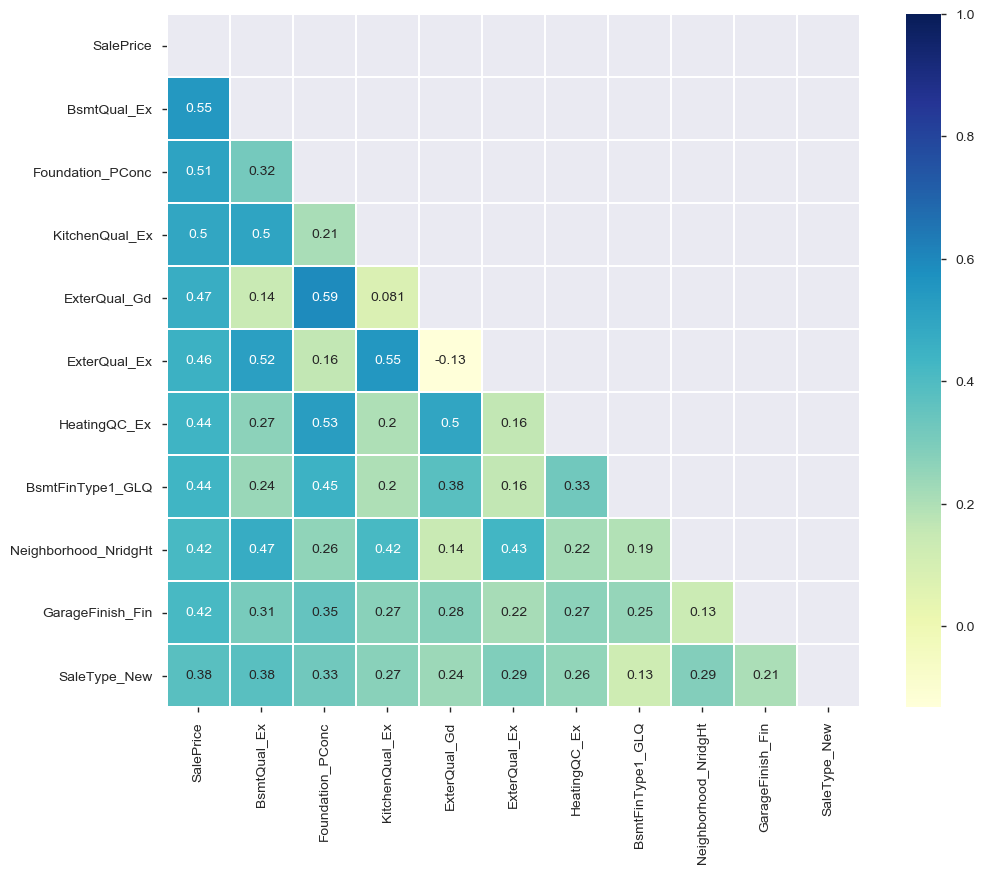

In [31]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat5, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat5));

corr : 0.549


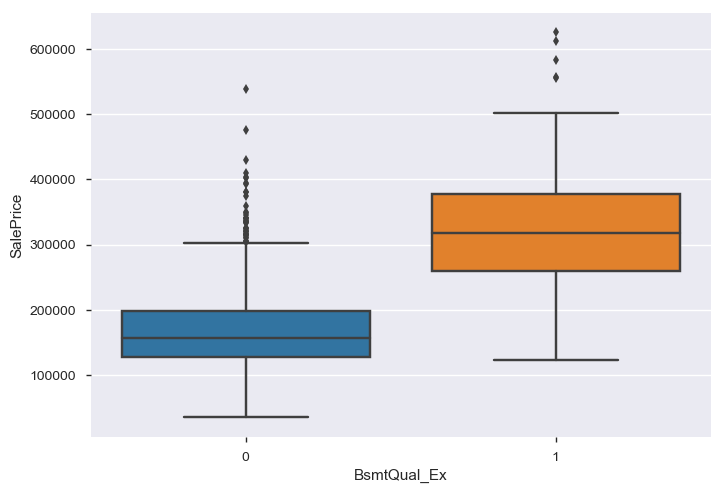

In [32]:
sns.boxplot(x='BsmtQual_Ex',y='SalePrice', data=train_full_qual)
print(f"corr : {round(train_full_qual['BsmtQual_Ex'].corr(train_full_qual['SalePrice']),3)}")

corr : 0.506


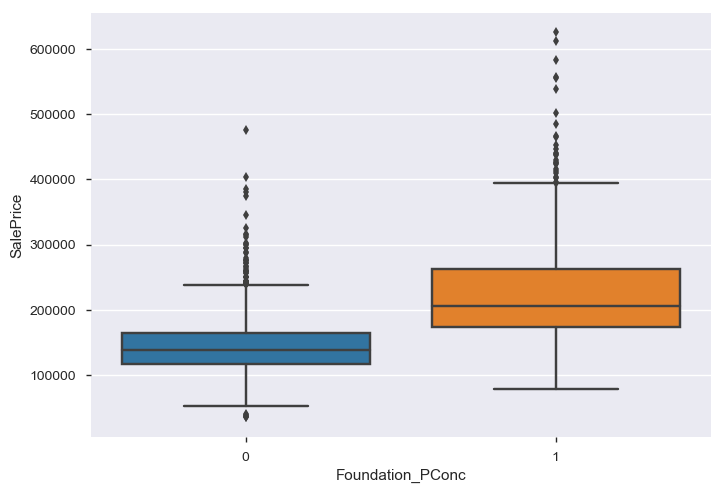

In [33]:
sns.boxplot(x='Foundation_PConc',y='SalePrice', data=train_full_qual)
print(f"corr : {round(train_full_qual['Foundation_PConc'].corr(train_full_qual['SalePrice']),3)}")

### Train_full = train_full_quant + train_full_quali[best corr]

In [34]:
train_full = train_full[quant][cols]
train_full['BsmtQual_Ex'] = train_full_qual['BsmtQual_Ex']
train_full['Foundation_PConc'] = train_full_qual['Foundation_PConc']
train_full.fillna(0)

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1451     175000            6       1647           2         460          953   
1452     210000            6       2073           2         500         1542   
1453     266500            7       2340           1         252         1152   
1454     142125            5       1078           1         240         1078   
1455     147500            5       1256           1         276         1256   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  BsmtQual_Ex  \
0          856         2             8       2003          2003            0   
1         1262         2             6       1976          1976            0   
2          920         2             6       2001          2002            0   
3          961         1             7       1915          1970            0   
4         1145         2             9       2000          2000            0   
...        ...       ...           ...        ...           ...          ...   
1451       953         2             7       1999          2000            0   
1452      2073         2             7       1978          1988            0   
1453      1188         2             9       1941          2006            0   
1454      1078         1             5       1950          1996            0   
1455      1256         1             6       1965          1965            0   

      Foundation_PConc  
0                    1  
1                    0  
2                    1  
3                    0  
4                    1  
...                ...  
1451                 1  
1452                 0  
1453                 0  
1454                 0  
1455                 0  

[1456 rows x 13 columns]

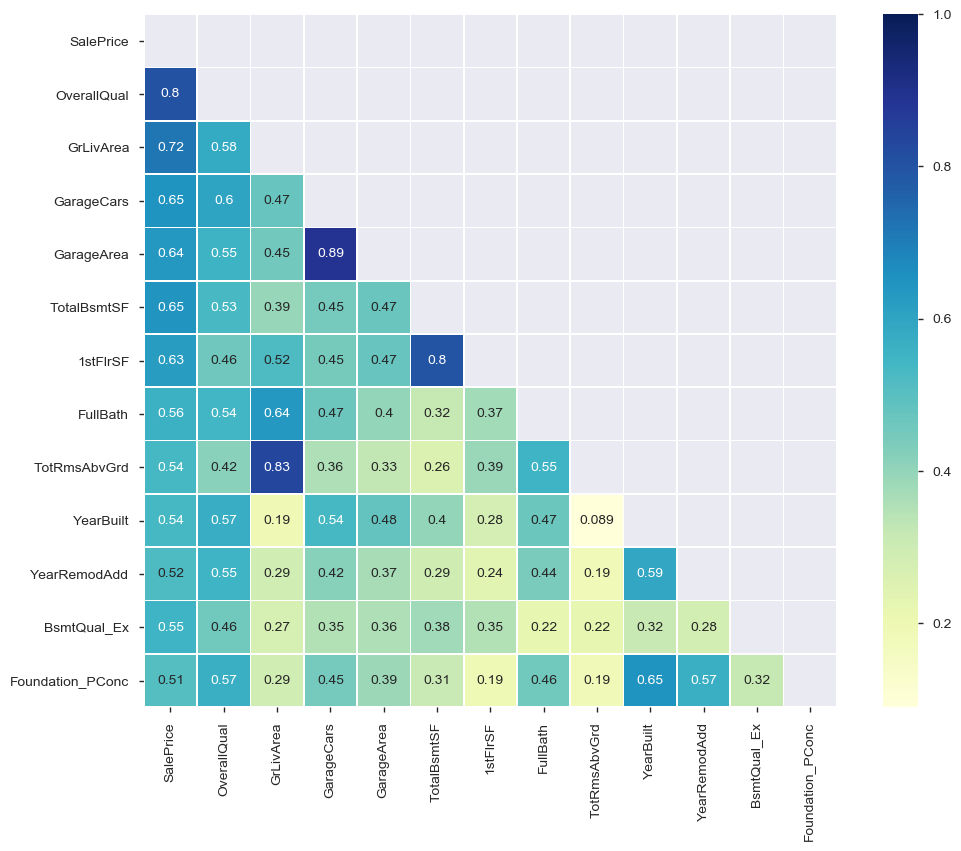

In [35]:
corrmat6 = train_full.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat6, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat6));

In [36]:
train_full = train_full.drop(train_full['TotRmsAbvGrd'])

In [37]:
train_full.head()

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0      208500            7       1710           2         548          856   
1      181500            6       1262           2         460         1262   
13     279500            7       1494           3         840         1494   
15     132000            7        854           2         576          832   
16     149000            6       1004           2         480         1004   

    1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  BsmtQual_Ex  \
0        856         2             8       2003          2003            0   
1       1262         2             6       1976          1976            0   
13      1494         2             7       2006          2007            0   
15       854         1             5       1929          2001            0   
16      1004         1             5       1970          1970            0   

    Foundation_PConc  
0                  1  
1                  0  
13                 1  
15                 0  
16                 0

### Split du train_full en train et val

In [38]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 42
random.seed(SEED)
train, val= train_test_split(train_full, test_size=0.3)

print("Train full shape: " + str(train_full.shape))
print("Train shape: " + str(train.shape))
print("Val shape: " + str(val.shape))

Train full shape: (1444, 13)
Train shape: (1010, 13)
Val shape: (434, 13)


### Séparation de X_train et Y_train sur train et val

In [39]:
target_column = 'SalePrice'
Y_train = train[target_column].values
X_train = train.drop(target_column, axis=1).values
X_val = val.drop(target_column, axis=1).values
Y_val = val[target_column].values

### Normalisation X

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Transfo SalePrice en log

In [41]:
Y_train = np.log1p(Y_train)
Y_val = np.log1p(Y_val)

### Normalisation Y

In [42]:
Y_train_reshaped = np.reshape(Y_train, (Y_train.shape[0], 1))
print(Y_train_reshaped.shape)
Y_val_reshaped = np.reshape(Y_val, (Y_val.shape[0], 1))
print(Y_val_reshaped.shape)

(1010, 1)
(434, 1)


In [43]:
scaler2 = StandardScaler()
scaler2.fit(Y_train_reshaped)

Y_train_scaled = scaler2.transform(Y_train_reshaped)
Y_val_scaled = scaler2.transform(Y_val_reshaped)

### Création modèle Sequential

In [44]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [45]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model.add(Input(shape=X_train_scaled.shape[1]))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))
loss = 'mse'
LEARNING_RATE = 0.001
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))
BATCH_SIZE = X_train_scaled.shape[0]
EPOCHS = 1000
history = model.fit(X_train_scaled, Y_train_scaled, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1010 samples
Epoch 1/1000
1010/1010 [==============================] - 1s 541us/sample - loss: 2.1021
Epoch 2/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 1.7952
Epoch 3/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 1.5454
Epoch 4/1000
1010/1010 [==============================] - 0s 5us/sample - loss: 1.3416
Epoch 5/1000
1010/1010 [==============================] - 0s 4us/sample - loss: 1.1749
Epoch 6/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 1.0381
Epoch 7/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.9255
Epoch 8/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.8327
Epoch 9/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.7559
Epoch 10/1000
1010/1010 [==============================] - 0s 4us/sample - loss: 0.6921
Epoch 11/1000
1010/1010 [==============================] - 0s 4us/sample - loss: 0.6389
Epoch 12/1000
101

Epoch 94/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1836
Epoch 95/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1829
Epoch 96/1000
1010/1010 [==============================] - 0s 4us/sample - loss: 0.1821
Epoch 97/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1813
Epoch 98/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1806
Epoch 99/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1799
Epoch 100/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1792
Epoch 101/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1786
Epoch 102/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1779
Epoch 103/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1773
Epoch 104/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1767
Epoch 105/1000
1010/1010 [=

Epoch 187/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1542
Epoch 188/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1540
Epoch 189/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1539
Epoch 190/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1538
Epoch 191/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1538
Epoch 192/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1537
Epoch 193/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1536
Epoch 194/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1535
Epoch 195/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1534
Epoch 196/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1533
Epoch 197/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1532
Epoch 198/1000
1010/1

Epoch 280/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1489
Epoch 281/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1489
Epoch 282/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1488
Epoch 283/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1488
Epoch 284/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1488
Epoch 285/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1487
Epoch 286/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1487
Epoch 287/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1487
Epoch 288/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1487
Epoch 289/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1486
Epoch 290/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1486
Epoch 291/1000
1010/1

Epoch 373/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1469
Epoch 374/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1468
Epoch 375/1000
1010/1010 [==============================] - 0s 4us/sample - loss: 0.1468
Epoch 376/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1468
Epoch 377/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1468
Epoch 378/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1468
Epoch 379/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1468
Epoch 380/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1468
Epoch 381/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1467
Epoch 382/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1467
Epoch 383/1000
1010/1010 [==============================] - 0s 4us/sample - loss: 0.1467
Epoch 384/1000
1010/1

Epoch 466/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1458
Epoch 467/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1458
Epoch 468/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1458
Epoch 469/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1458
Epoch 470/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1458
Epoch 471/1000
1010/1010 [==============================] - 0s 5us/sample - loss: 0.1458
Epoch 472/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1458
Epoch 473/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1457
Epoch 474/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1457
Epoch 475/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1457
Epoch 476/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1457
Epoch 477/1000
1010/1

Epoch 559/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1452
Epoch 560/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1452
Epoch 561/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1452
Epoch 562/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1452
Epoch 563/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1452
Epoch 564/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1452
Epoch 565/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1452
Epoch 566/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1452
Epoch 567/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1452
Epoch 568/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1451
Epoch 569/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1451
Epoch 570/1000
1010/1

Epoch 652/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1448
Epoch 653/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1448
Epoch 654/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1448
Epoch 655/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1448
Epoch 656/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1448
Epoch 657/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1448
Epoch 658/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1448
Epoch 659/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1448
Epoch 660/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1448
Epoch 661/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1448
Epoch 662/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1448
Epoch 663/1000
1010/1

1010/1010 [==============================] - 0s 3us/sample - loss: 0.1446
Epoch 745/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1446
Epoch 746/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1446
Epoch 747/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1446
Epoch 748/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1446
Epoch 749/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1446
Epoch 750/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1446
Epoch 751/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1446
Epoch 752/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1446
Epoch 753/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1446
Epoch 754/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1446
Epoch 755/1000
1010/1010 [==========

Epoch 837/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1444
Epoch 838/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1444
Epoch 839/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1444
Epoch 840/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1444
Epoch 841/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1444
Epoch 842/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1444
Epoch 843/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1444
Epoch 844/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1444
Epoch 845/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1444
Epoch 846/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1444
Epoch 847/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1444
Epoch 848/1000
1010/1

Epoch 930/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1443
Epoch 931/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1443
Epoch 932/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1443
Epoch 933/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1443
Epoch 934/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1443
Epoch 935/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1443
Epoch 936/1000
1010/1010 [==============================] - 0s 2us/sample - loss: 0.1443
Epoch 937/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1443
Epoch 938/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1443
Epoch 939/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1443
Epoch 940/1000
1010/1010 [==============================] - 0s 3us/sample - loss: 0.1443
Epoch 941/1000
1010/1

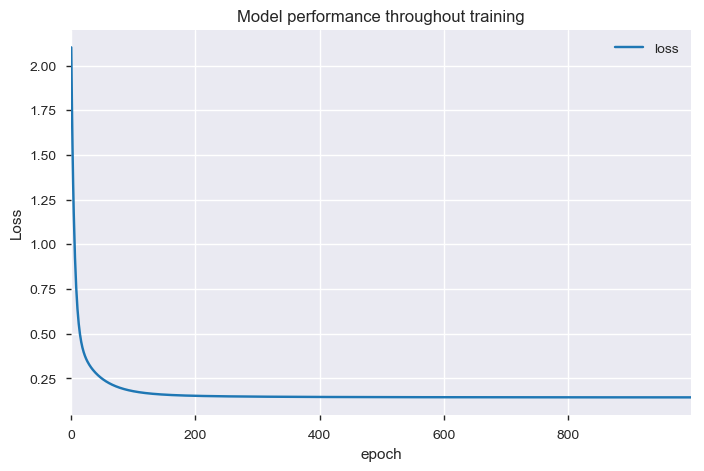

In [46]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

### Prédiction sur X_val

In [53]:
predict = model.predict(X_val_scaled)

### Calcul de l'erreur sur la prédiction

In [54]:
from sklearn.metrics import mean_squared_error

mse_krm=mean_squared_error(Y_val_scaled, predict)
print(mse_krm)

0.1466156861228005


### Reconversion du SalePrice

In [55]:
predict = scaler2.inverse_transform(predict)
predict  = np.e**predict

In [56]:
predict

array([[151543.73 ],
       [176772.75 ],
       [152666.33 ],
       [129573.9  ],
       [116980.24 ],
       [138392.25 ],
       [122148.79 ],
       [144359.73 ],
       [171226.2  ],
       [135894.75 ],
       [ 90888.484],
       [239050.14 ],
       [ 97447.94 ],
       [215790.25 ],
       [183490.9  ],
       [133633.34 ],
       [144769.2  ],
       [ 96237.44 ],
       [150723.19 ],
       [105996.45 ],
       [255080.08 ],
       [181850.73 ],
       [137714.22 ],
       [116741.63 ],
       [ 85207.836],
       [195234.9  ],
       [167274.6  ],
       [172653.61 ],
       [142939.25 ],
       [136060.48 ],
       [102570.04 ],
       [171205.31 ],
       [188911.17 ],
       [170401.61 ],
       [108580.79 ],
       [139915.98 ],
       [109663.914],
       [244732.6  ],
       [173743.25 ],
       [136793.11 ],
       [113432.3  ],
       [185428.94 ],
       [135328.03 ],
       [160454.56 ],
       [174700.95 ],
       [206916.77 ],
       [113518.23 ],
       [19377